# Import & Read

In [1]:
# import package & library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
# load data set
data = pd.read_csv('Train.csv')

In [3]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


1 = late; 0 = on time

# Data Cleaning & Preprocessing

In [4]:
data.rename(columns={'Reached.on.Time_Y.N':'Reached_on_time'}, inplace=True)

In [5]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### Detecting & Handling Missing Values

In [6]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_time        0
dtype: int64

In [7]:
data.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_time        0
dtype: int64

### Detecting & Handling Outliers

In [8]:
check_outlier = data.select_dtypes('int64')
check_outlier.columns

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached_on_time'],
      dtype='object')

In [9]:
# Make function to detect outlier using upper bound and lower bound
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("- Number of Outlier From Variable {} : {}".format(sample.name, number_outlier))
    
#     if number_outlier>0:
#         print("  Outlier observation row:")
#     else:
#         pass
#     out_list = []
    
#     for i in range(len(sample)):
#         if sample[i]<lower_range: 
#             out_list.append(i)
#         elif sample[i]>upper_range:
#             out_list.append(i) 
#         else:
#             pass
#     if out_list != []:
#         print(' ', out_list)

In [10]:
for column in check_outlier.columns:
    outlier(data[column])

- Number of Outlier From Variable ID : 0
- Number of Outlier From Variable Customer_care_calls : 0
- Number of Outlier From Variable Customer_rating : 0
- Number of Outlier From Variable Cost_of_the_Product : 0
- Number of Outlier From Variable Prior_purchases : 1003
- Number of Outlier From Variable Discount_offered : 2209
- Number of Outlier From Variable Weight_in_gms : 0
- Number of Outlier From Variable Reached_on_time : 0


<AxesSubplot:xlabel='Discount_offered'>

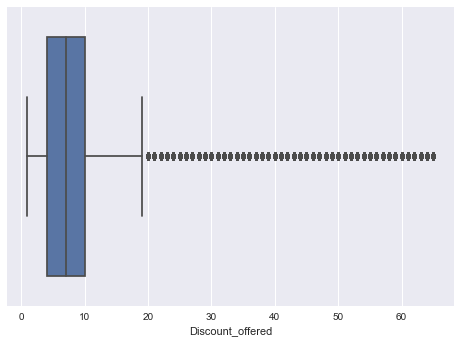

In [11]:
sns.boxplot(data['Discount_offered'])

In [12]:
data['Discount_offered'].nunique()

65

<AxesSubplot:xlabel='Prior_purchases'>

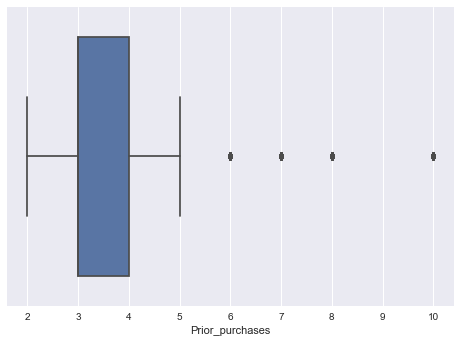

In [13]:
sns.boxplot(data['Prior_purchases'])

In [14]:
data['Prior_purchases'].nunique()

8

### Detecting & Handling Duplicates Values

In [15]:
data.duplicated().any()

False

### Detecting & Handling Imbalance Data

In [16]:
data['Reached_on_time'].value_counts()

1    6563
0    4436
Name: Reached_on_time, dtype: int64

<AxesSubplot:>

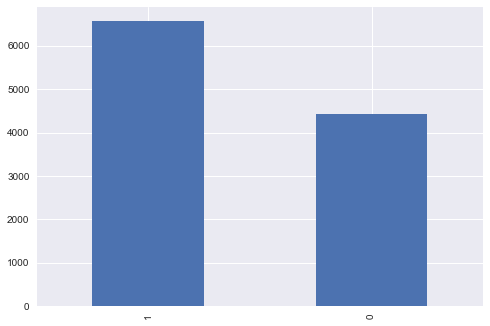

In [17]:
data['Reached_on_time'].value_counts().plot(kind='bar')

## Exploratory Data Analysis (EDA)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached_on_time      10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [19]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_time
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [20]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [21]:
data.shape

(10999, 12)

In [22]:
data['Reached_on_time'].value_counts()

1    6563
0    4436
Name: Reached_on_time, dtype: int64

In [23]:
for column in data.columns:
    print('Count unique data of {} : {}'.format(column,data[column].nunique()))

Count unique data of ID : 10999
Count unique data of Warehouse_block : 5
Count unique data of Mode_of_Shipment : 3
Count unique data of Customer_care_calls : 6
Count unique data of Customer_rating : 5
Count unique data of Cost_of_the_Product : 215
Count unique data of Prior_purchases : 8
Count unique data of Product_importance : 3
Count unique data of Gender : 2
Count unique data of Discount_offered : 65
Count unique data of Weight_in_gms : 4034
Count unique data of Reached_on_time : 2


In [24]:
numerical = []
categorical = []

for column in data.columns:
    if data[column].nunique() > 10:
        numerical.append(column)
    else:
        categorical.append(column)

print('numerical : ', numerical)
print()
print('categorical: ', categorical)


numerical :  ['ID', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

categorical:  ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Product_importance', 'Gender', 'Reached_on_time']


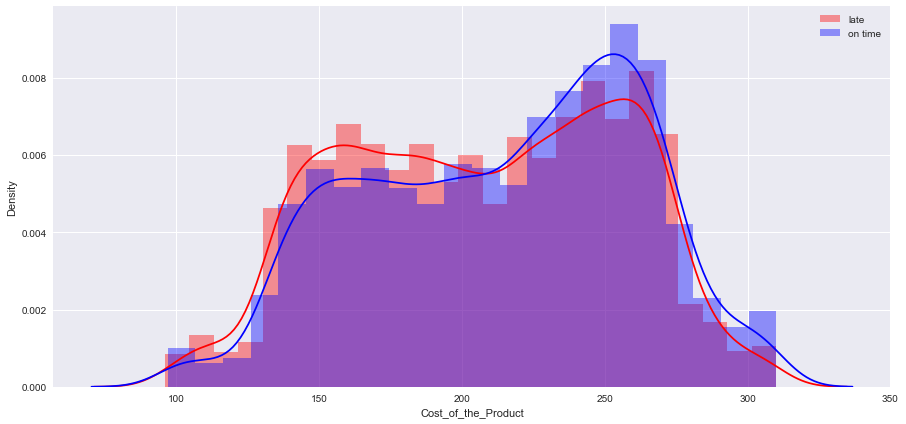

In [25]:
plt.figure(figsize=(15,7))
sns.distplot(data.Cost_of_the_Product[data['Reached_on_time'] == 1],color='r',label='late')
sns.distplot(data.Cost_of_the_Product[data['Reached_on_time'] == 0],color='b', label='on time')
plt.legend()

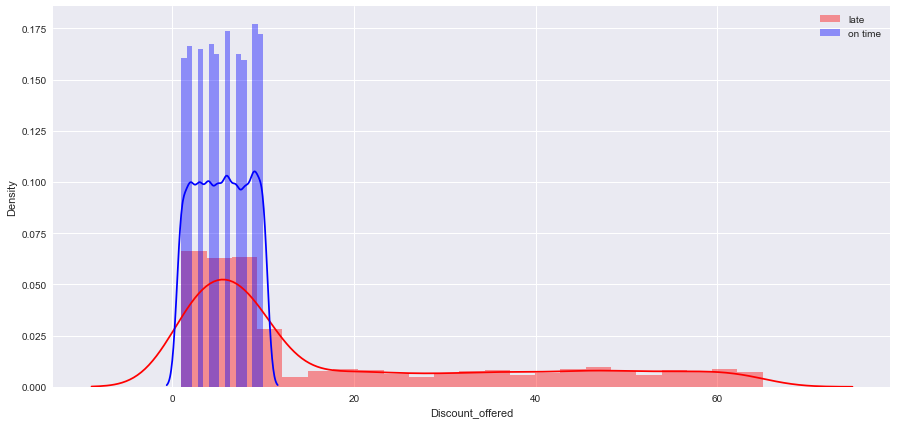

In [26]:
plt.figure(figsize=(15,7))
sns.distplot(data.Discount_offered[data['Reached_on_time'] == 1],color='r',label='late')
sns.distplot(data.Discount_offered[data['Reached_on_time'] == 0],color='b', label='on time')
plt.legend()

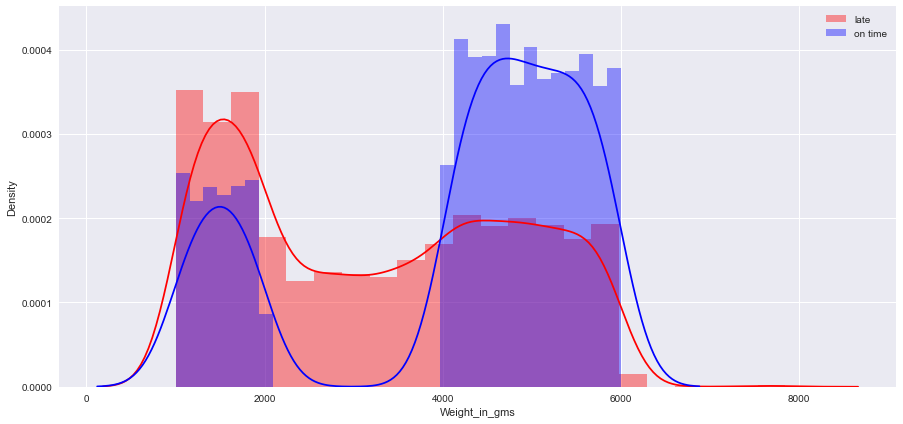

In [27]:
plt.figure(figsize=(15,7))
sns.distplot(data.Weight_in_gms[data['Reached_on_time'] == 1],color='r',label='late')
sns.distplot(data.Weight_in_gms[data['Reached_on_time'] == 0],color='b', label='on time')
plt.legend()

In [28]:
# cek berat produk 2000 - 4000

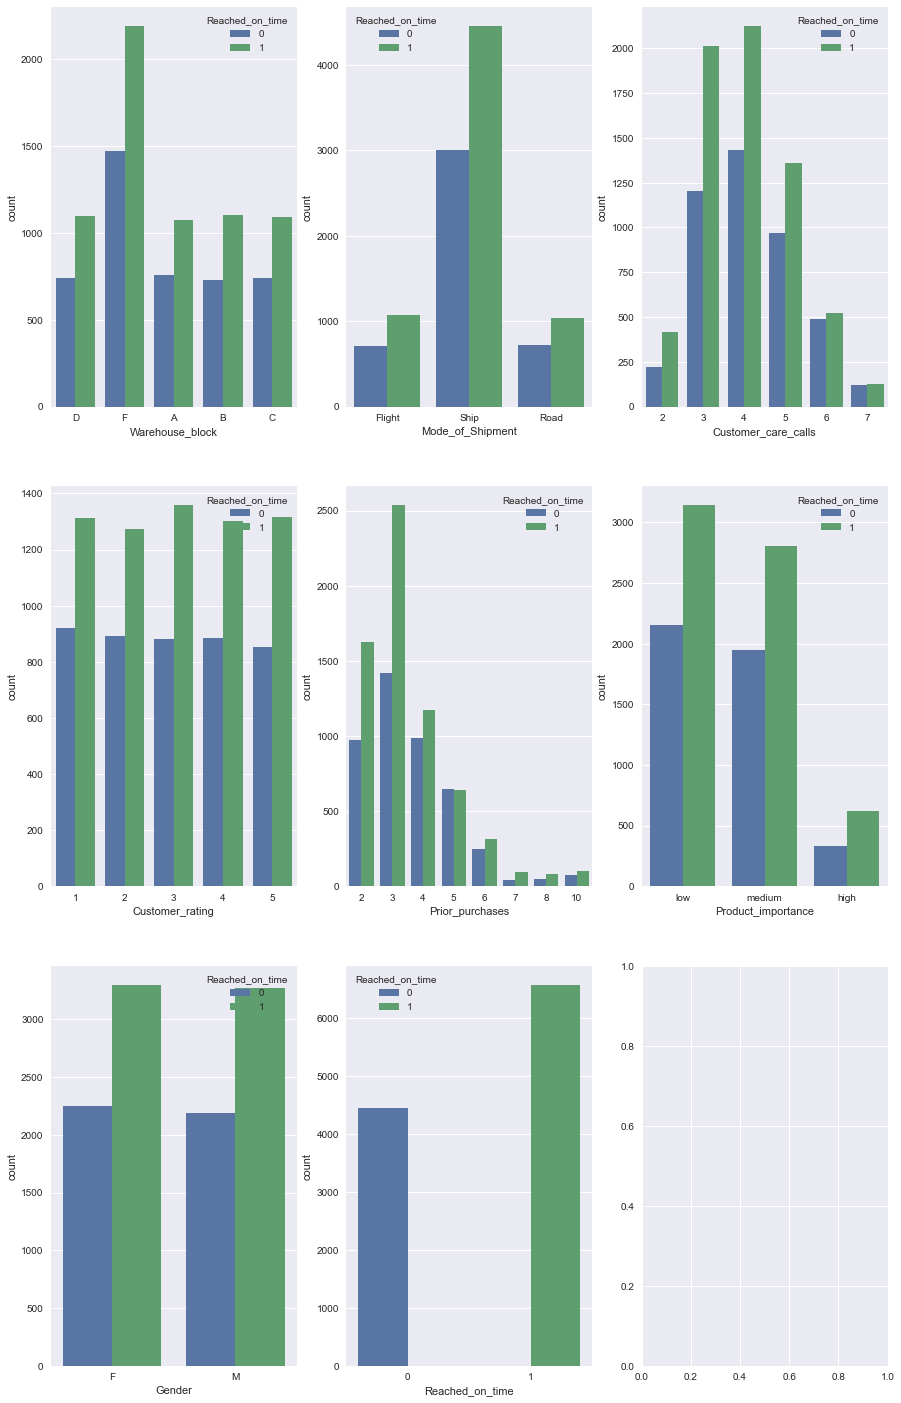

In [29]:
fig, ax = plt.subplots(3,3,figsize=(15,25))

for var, ax in zip(categorical,ax.flatten()):
    sns.countplot(var, data=data, hue='Reached_on_time', ax=ax)

In [30]:
data.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_time
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached_on_time,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


<AxesSubplot:>

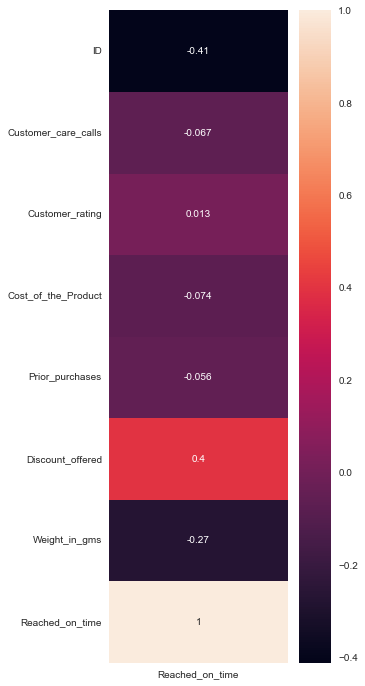

In [31]:
plt.figure(figsize=(4,12))
sns.heatmap(data.corr()[['Reached_on_time']], annot=True)

# Data Preparation

In [32]:
data = data.drop(columns=['ID'])

### Encoding

In [33]:
encode_columns = list(data.select_dtypes('object').columns)
encode_le = []
encode_ohe = []

In [34]:
for column in encode_columns:
    if data[column].nunique() > 2:
        encode_ohe.append(column)
    else:
        encode_le.append(column)

In [35]:
print(encode_le)
print(encode_ohe)

['Gender']
['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in encode_le:
    data[column] = le.fit_transform(data[column])

In [37]:
data = pd.get_dummies(data, columns=encode_ohe)

In [38]:
data.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached_on_time,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,2,177,3,0,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,5,216,2,1,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,2,183,4,1,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
3,3,3,176,4,1,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
4,2,2,184,3,0,46,2484,1,0,0,1,0,0,1,0,0,0,0,1


# Model & Evaluation

In [39]:
x = data.drop(['Reached_on_time'], axis=1) # features
y = data['Reached_on_time'] # target

In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

Model - Decision Tree

In [122]:
# import model Decision Tree
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier(criterion='gini', random_state=42)

# modelling
modelDT.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [123]:
y_pred_dt = modelDT.predict(x_test)

Model - Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
modelRF = RandomForestClassifier(criterion='gini',random_state=42)

#modelling
modelRF.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [126]:
y_pred_rf = modelRF.predict(x_test)

Model - XGBoost

In [127]:
from xgboost import XGBClassifier

In [128]:
modelXGB = XGBClassifier()
modelXGB.fit(x_train,y_train)

[06:28:47] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
y_pred_xgb = modelXGB.predict(x_test)

Compare

In [130]:
# bandingkan data actual dan prediksi
compare = pd.DataFrame({
    'Actual' : y_test,
    'Prediction DT' : y_pred_dt,
    'Prediction RF' : y_pred_rf,
    'Prediction XGB' : y_pred_xgb
}).reset_index()
compare.head()

,index,Actual,Prediction DT,Prediction RF,Prediction XGB
0,107,1,1,1,1
1,5594,1,1,0,1
2,6997,0,1,1,1
3,3984,0,0,0,1
4,3111,1,1,1,1


## Evaluation

In [131]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Evaluation - Confussion Matrix

In [132]:
# cm decision tree
print(confusion_matrix(y_test,y_pred_dt))

[[512 383]
 [392 913]]


In [133]:
# cm random forest
print(confusion_matrix(y_test,y_pred_rf))

[[625 270]
 [459 846]]


In [134]:
# cm xgboost
print(confusion_matrix(y_test,y_pred_xgb))

[[581 314]
 [433 872]]


Text(0.5, 29.5, 'Prediction')

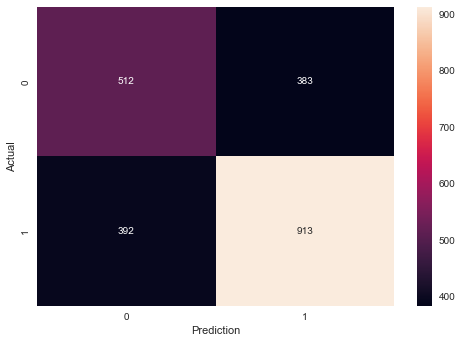

In [135]:
# visualisasi cm decision tree
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True, fmt='.3g')
plt.ylabel('Actual')
plt.xlabel('Prediction')

Text(0.5, 29.5, 'Prediction')

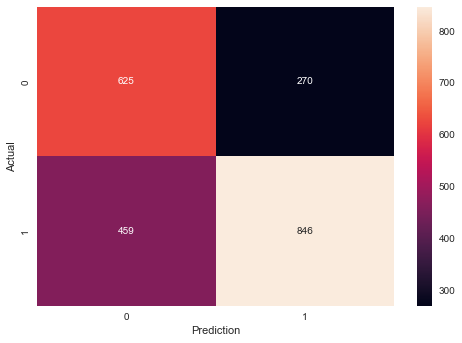

In [136]:
# visualisasi cm random forest
sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True, fmt='.3g')
plt.ylabel('Actual')
plt.xlabel('Prediction')

Text(0.5, 29.5, 'Prediction')

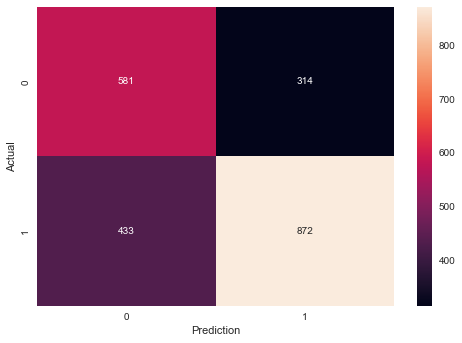

In [137]:
# visualisasi cm xgbooost
sns.heatmap(confusion_matrix(y_test,y_pred_xgb),annot=True, fmt='.3g')
plt.ylabel('Actual')
plt.xlabel('Prediction')

Evaluation - Classification Report

In [138]:
# cr decision tree
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



In [139]:
# cr random forest
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.58      0.70      0.63       895
           1       0.76      0.65      0.70      1305

    accuracy                           0.67      2200
   macro avg       0.67      0.67      0.67      2200
weighted avg       0.68      0.67      0.67      2200



In [140]:
# cr xgboost
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.57      0.65      0.61       895
           1       0.74      0.67      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.65      0.66      0.65      2200
weighted avg       0.67      0.66      0.66      2200



Evaluation - Accuracy Score

In [141]:
# score decision tree
print(accuracy_score(y_test, y_pred_dt)*100)

64.77272727272727


In [142]:
# score random forest
print(accuracy_score(y_test, y_pred_rf)*100)

66.86363636363636


In [143]:
# score xgboost
print(accuracy_score(y_test, y_pred_xgb)*100)

66.04545454545455


# Tuning

In [144]:
from sklearn.model_selection import GridSearchCV

Tuning - DecisionTree

In [145]:
params = {
    'criterion' : ['gini','entropy'],
    'splitter' : ['best','random'],
    'max_depth' : range(1,10),
    'min_samples_split' : range(1,10),
    'min_samples_leaf' : range(1,10)
}

model = GridSearchCV(DecisionTreeClassifier(),params,cv=3,verbose=1,n_jobs=-1)
model.fit(x_train,y_train)

Fitting 3 folds for each of 2916 candidates, totalling 8748 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [146]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'best'}

In [147]:
model.best_score_

0.6822366177974771

Tuning - Random Forest

In [148]:
params = {
     'criterion' : ['gini','entropy'],
     'bootstrap': [True, False],
     'max_depth': range(1,10),
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': range(1,10),
     'min_samples_split': range(1,10),
     'n_estimators': range(1,10)
}

model = GridSearchCV(RandomForestClassifier(),params,cv=3,verbose=1,n_jobs=-1)
model.fit(x_train,y_train)

Fitting 3 folds for each of 52488 candidates, totalling 157464 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10),
                         'n_estimators': range(1, 10)},
             verbose=1)

In [149]:
model.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 9}

In [150]:
model.best_score_

0.6829185134674395

Tuning - xgboost

In [ ]:
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

model = GridSearchCV(XGBClassifier(),params,cv=3,verbose=1,n_jobs=-1)
model.fit(x_train,y_train)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


In [ ]:
model.best_params_

In [ ]:
model.best_score_